# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=Metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
   

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response=requests.get(city_url).json()
       
        city_weather = response["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng =response["coord"]["lon"]
        city_max_temp =response["main"]["temp_max"]
        city_humidity =response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country =response["sys"]["country"]
        city_date = response["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-nera
Processing Record 2 of Set 1 | jining
Processing Record 3 of Set 1 | verkhnevilyuysk
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | ola
Processing Record 6 of Set 1 | kaindy
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | enewetak
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | inhambane
Processing Record 12 of Set 1 | itoman
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | petropavlovsk-kamchatsky
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | torre del mar
Processing Record 17 of Set 1 | griffith
Processing Record 18 of Set 1 | dueville
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | lihue
Processing Record 21 of Set 1 | saipan
Processing Record 22 of Set 1 | college
Processing Record 23

Processing Record 37 of Set 4 | amahai
Processing Record 38 of Set 4 | hobyo
Processing Record 39 of Set 4 | dayapar
City not found. Skipping...
Processing Record 40 of Set 4 | lazaro cardenas
Processing Record 41 of Set 4 | monrovia
Processing Record 42 of Set 4 | al 'alamayn
City not found. Skipping...
Processing Record 43 of Set 4 | nova sintra
Processing Record 44 of Set 4 | ilulissat
Processing Record 45 of Set 4 | sonoita
Processing Record 46 of Set 4 | chibougamau
Processing Record 47 of Set 4 | nefta
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | santa cruz de tenerife
Processing Record 0 of Set 5 | port lincoln
Processing Record 1 of Set 5 | prince rupert
Processing Record 2 of Set 5 | knyaze-volkonskoye
Processing Record 3 of Set 5 | uribia
Processing Record 4 of Set 5 | axim
Processing Record 5 of Set 5 | steubenville
Processing Record 6 of Set 5 | necochea
Processing Record 7 of Set 5 | palmas
Processing Record 8 of Set 5 | kempsey
Processing Record 9 

Processing Record 31 of Set 8 | minas de marcona
Processing Record 32 of Set 8 | nushki
Processing Record 33 of Set 8 | yugawara
Processing Record 34 of Set 8 | mossel bay
Processing Record 35 of Set 8 | la almunia de dona godina
Processing Record 36 of Set 8 | tabou
Processing Record 37 of Set 8 | merizo village
Processing Record 38 of Set 8 | tofol
Processing Record 39 of Set 8 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 40 of Set 8 | darab
Processing Record 41 of Set 8 | tsiombe
Processing Record 42 of Set 8 | tres palos
Processing Record 43 of Set 8 | fort-shevchenko
Processing Record 44 of Set 8 | fagaras
Processing Record 45 of Set 8 | kapa'a
Processing Record 46 of Set 8 | krapivinskiy
Processing Record 47 of Set 8 | sikonge
Processing Record 48 of Set 8 | zeliezovce
Processing Record 49 of Set 8 | la gi
Processing Record 0 of Set 9 | barrouallie
Processing Record 1 of Set 9 | la tuque
Processing Record 2 of Set 9 | paka
Processing Record 3 of Set 9 | pangkalpin

Processing Record 17 of Set 12 | gaiman
Processing Record 18 of Set 12 | kresek
Processing Record 19 of Set 12 | san fernando de apure
Processing Record 20 of Set 12 | puerto aysen
Processing Record 21 of Set 12 | ardesen
Processing Record 22 of Set 12 | heihe
Processing Record 23 of Set 12 | tamanrasset
Processing Record 24 of Set 12 | sao felix do xingu
Processing Record 25 of Set 12 | ghardaia
Processing Record 26 of Set 12 | puerto deseado
Processing Record 27 of Set 12 | tuensang
Processing Record 28 of Set 12 | ipora
Processing Record 29 of Set 12 | sihanoukville
Processing Record 30 of Set 12 | menominee
Processing Record 31 of Set 12 | pico truncado
Processing Record 32 of Set 12 | buckeye
Processing Record 33 of Set 12 | suva
Processing Record 34 of Set 12 | xilin hot
Processing Record 35 of Set 12 | turochak
Processing Record 36 of Set 12 | morondava
Processing Record 37 of Set 12 | decatur
Processing Record 38 of Set 12 | cinarli
Processing Record 39 of Set 12 | tafresh
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df["Max Temp"] = city_data_df["Max Temp"]
# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust-nera,64.5667,143.2000,-13.16,94,100,1.37,RU,1697320504
1,jining,35.4050,116.5814,14.22,49,0,2.51,CN,1697320504
2,verkhnevilyuysk,63.4453,120.3167,-11.14,92,5,2.24,RU,1697320504
3,kodiak,57.7900,-152.4072,6.73,70,0,2.06,US,1697320504
4,ola,59.5833,151.2833,-1.44,68,94,1.92,RU,1697320505


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,-13.16,94,100,1.37,RU,1697320504
1,jining,35.4050,116.5814,14.22,49,0,2.51,CN,1697320504
2,verkhnevilyuysk,63.4453,120.3167,-11.14,92,5,2.24,RU,1697320504
3,kodiak,57.7900,-152.4072,6.73,70,0,2.06,US,1697320504
4,ola,59.5833,151.2833,-1.44,68,94,1.92,RU,1697320505


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

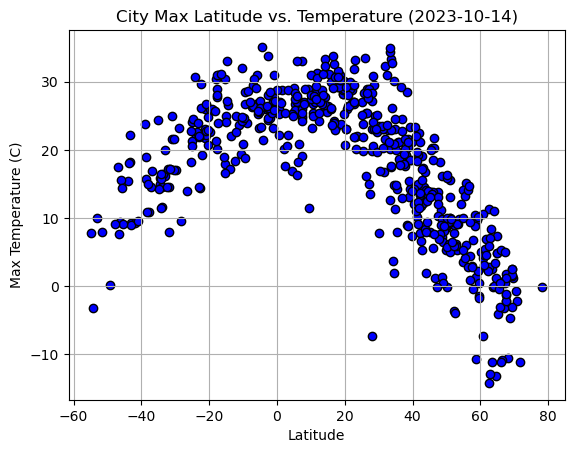

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],facecolor="blue",edgecolor="black")

current_time = time.localtime()
formatted_date = time.strftime("%Y-%m-%d", current_time)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Max Latitude vs. Temperature ({formatted_date})")

# Save the figure
plt.savefig("output_data/Fig1.png")
plt.grid()
# Show plot
plt.show()


#### Latitude Vs. Humidity

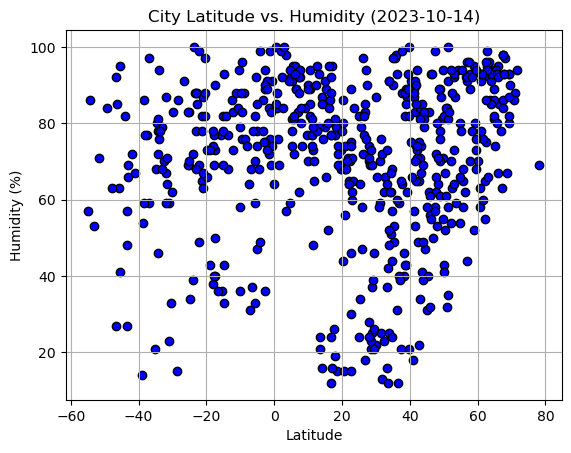

In [14]:
#  Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],facecolor="blue",edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({formatted_date})")


# Save the figure
plt.savefig("output_data/Fig2.png")
plt.grid()
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

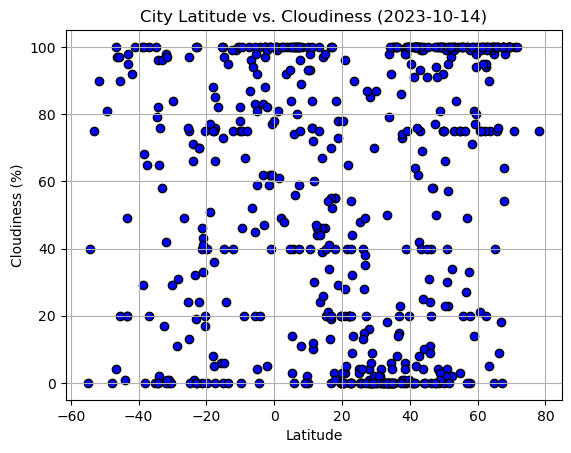

In [15]:
#  Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],facecolor="blue",edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({formatted_date})")

# Save the figure
plt.savefig("output_data/Fig3.png")
plt.grid()
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

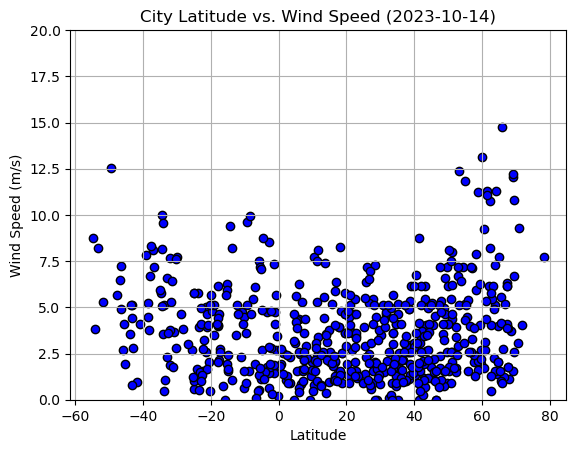

In [16]:
#Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],facecolor="blue",edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({formatted_date})")
plt.ylim(0,20)
# Save the figure
plt.savefig("output_data/Fig4.png")
plt.grid()
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values,x_label,y_label):
    x_values = x_values
    y_values = y_values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    x_annotation = min(x_values)
    y_annotation=max(y_values)
    plt.annotate(line_eq,(x_annotation,y_annotation),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,-13.16,94,100,1.37,RU,1697320504
1,jining,35.4050,116.5814,14.22,49,0,2.51,CN,1697320504
2,verkhnevilyuysk,63.4453,120.3167,-11.14,92,5,2.24,RU,1697320504
3,kodiak,57.7900,-152.4072,6.73,70,0,2.06,US,1697320504
4,ola,59.5833,151.2833,-1.44,68,94,1.92,RU,1697320505


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
8,ushuaia,-54.8000,-68.3000,7.81,57,0,8.75,AR,1697320505
9,saint-philippe,-21.3585,55.7679,21.77,82,46,5.03,RE,1697320505
10,inhambane,-23.8650,35.3833,21.96,72,66,5.76,MZ,1697320506
12,invercargill,-46.4000,168.3500,9.45,85,97,4.92,NZ,1697320506
14,waitangi,-43.9535,-176.5597,15.46,82,1,3.58,NZ,1697320506


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8347336600120401


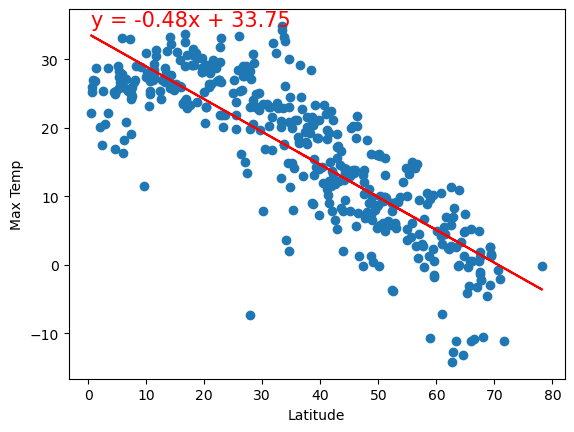

In [20]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Latitude','Max Temp')


The r-value is: 0.7817594040592585


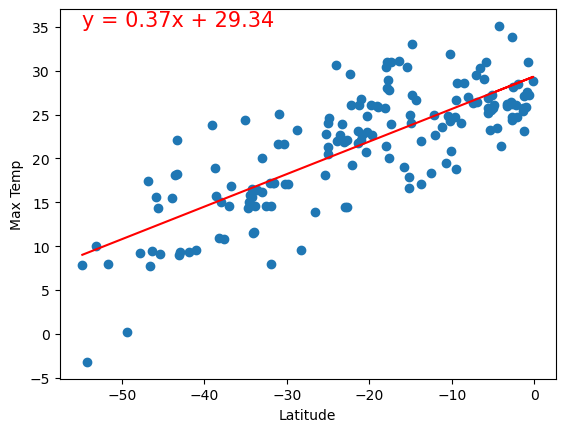

In [21]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Latitude','Max Temp')

**Discussion about the linear relationship:** 
There is a negative correlation between latitude and maximum temperature for northern hemisphere. The negaive correlation coefficient r indicates that the latitude and temperature are highly negativelty correlated - maximum temperature decreases with latitude.
There is a postive correlation between latitude and maximum temperature for northern hemisphere. The positive correlation coefficient r indicates that the latitude and temperature are highly positively correlated- maximum temperature increases with latitude.
Prediction can be done using this model.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09296684393482374


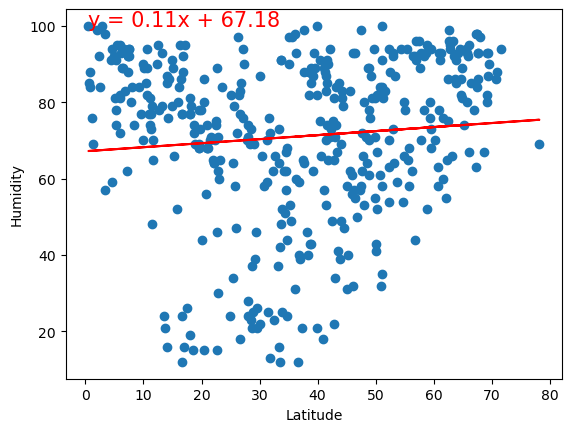

In [22]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Latitude','Humidity')

The r-value is: 0.16909083708990819


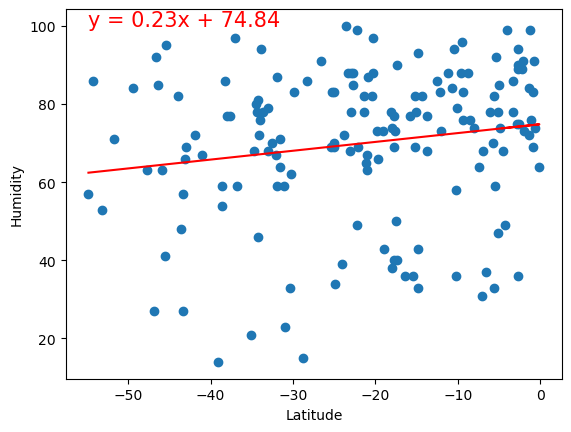

In [23]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Latitude','Humidity')

**Discussion about the linear relationship:** 
There is a weak positve correlation between latitude and humidity for northern hemisphere and a weak negative correlation between latitude and humidity of southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2119160178074454


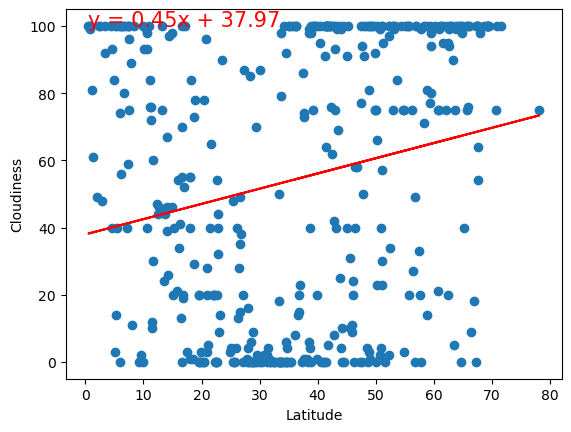

In [24]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Latitude','Cloudiness')

The r-value is: 0.17706019008060225


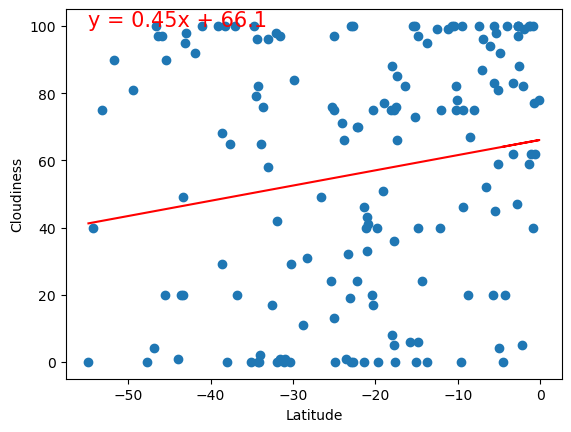

In [25]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Latitude','Cloudiness')

**Discussion about the linear relationship:** There is a weak positive correlation between the latitude and cloudiness in the northern adn southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.30090010005872614


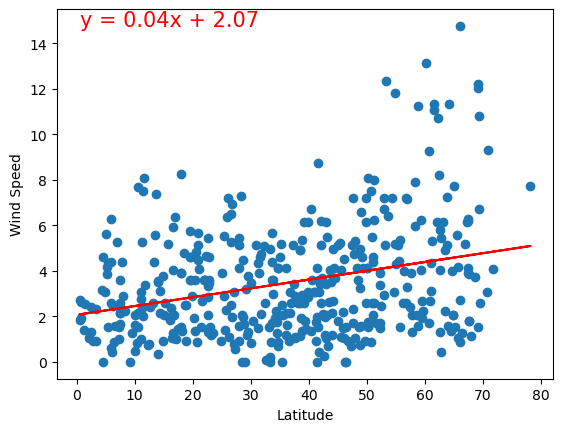

In [26]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Latitude','Wind Speed')

The r-value is: -0.2730751013806297


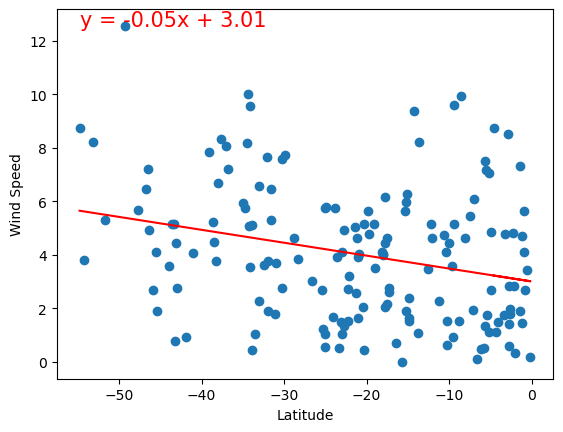

In [27]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Latitude','Wind Speed')

**Discussion about the linear relationship:** There is a weak positve correlation between latitude and wind speed for northern hemisphere and a weak negative correlation between latitude and wind for southern hemisphere.